In [40]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [32]:
#1a
n = 100
p1 = 0.05
r1 = np.arange(0,10)

alpha = sps.binom.pmf(r1,n,p1)
print("Alpha = {:.4f} = {:.2f}%".format(1-np.sum(alpha),100-np.sum(alpha)*100))
print("Probability to reject the null hypothesis given the null hypothesis is true")

Alpha = 0.0282 = 2.82%
Probability to reject the null hypothesis given the null hypothesis is true


In [38]:
#1b
n = 100
p2 = 0.15
r2 = np.arange(0,10)
beta = 1-np.sum(sps.binom.pmf(r2,n,p2))
print(1-beta)
print("Beta = {:.4f} = {:.2f}%".format(1-beta,100-beta*100))
print("Probability to accept the null hypothesis given the null hypothesis is false")

0.05509463169229445
Beta = 0.0551 = 5.51%
Probability to accept the null hypothesis given the null hypothesis is false


In [64]:
#2

class Gaussian:
    def __init__(self,xval,sigma,length,mass,momentum):
        self.xval = xval
        self.sigma = sigma
        self.length = length
        self.mean = self.length*np.sqrt(1+(mass/momentum)**2)
        
        
    def integralabove(self):
        func = lambda x: 1/(self.sigma*np.sqrt(2*np.pi))*np.exp(-np.square(x-self.mean)/(2*np.square(self.sigma)))
        
        return integrate.quad(func,self.xval,np.inf)[0]
    
    def integralbelow(self):
        func = lambda x: 1/(self.sigma*np.sqrt(2*np.pi))*np.exp(-np.square(x-self.mean)/(2*np.square(self.sigma)))
        
        return integrate.quad(func,0,self.xval)[0]
        
        
class ROC:
    def __init__(self,momentum,threshold,k_mass,p_mass,sigma,length):
        self.momentum = momentum
        self.threshold = threshold
        self.sigma = sigma
        self.length = length
        self.kaon = Gaussian(self.threshold,self.sigma,self.length,k_mass,self.momentum)
        self.pion = Gaussian(self.threshold,self.sigma,self.length,p_mass,self.momentum)
        
        
    def pair(self):
        alpha = self.pion.integralabove()
        beta = self.kaon.integralbelow()

        
        return alpha,beta
        

In [67]:
sigma = 0.4 #ns
length = 66.7 #ns
m_kaon = 493.7 #MeV
m_pion = 139.6 #MeV

mom_1 = 3e3 #MeV
mom_2 = 4e3 #MeV
mom_3 = 6e3 #MeV

t_range = np.linspace(66,68,100) #ns

alpha_1 = []
alpha_2 = []
alpha_3 = []
beta_1 = []
beta_2 = []
beta_3 = []

for t in t_range:
    one = ROC(mom_1,t,m_kaon,m_pion,sigma,length)
    al1,be1 = one.pair()
    alpha_1.append(al1)
    beta_1.append(be1)
    two = ROC(mom_2,t,m_kaon,m_pion,sigma,length)
    al2,be2 = two.pair()
    alpha_2.append(al2)
    beta_2.append(be2)
    three = ROC(mom_3,t,m_kaon,m_pion,sigma,length)
    al3,be3 = three.pair()
    alpha_3.append(al3)
    beta_3.append(be3)
    

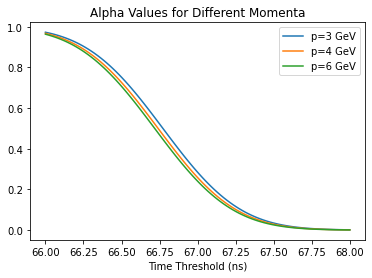

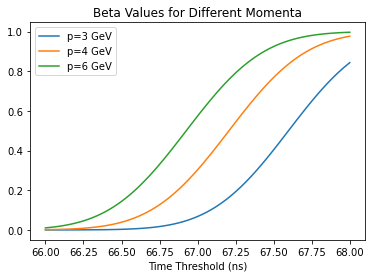

In [72]:
plt.plot(t_range,alpha_1,label='p=3 GeV')
plt.plot(t_range,alpha_2,label='p=4 GeV')
plt.plot(t_range,alpha_3,label='p=6 GeV')
plt.legend()
plt.title("Alpha Values for Different Momenta")
plt.xlabel("Time Threshold (ns)")
plt.show()

plt.plot(t_range,beta_1,label='p=3 GeV')
plt.plot(t_range,beta_2,label='p=4 GeV')
plt.plot(t_range,beta_3,label='p=6 GeV')
plt.legend()
plt.title("Beta Values for Different Momenta")
plt.xlabel("Time Threshold (ns)")
plt.show()

For alpha, p doesn't make much difference but for beta, p does make a difference. The lower momentum reduces the particle misidentification

total # of events = 43.0 # of bins = 50


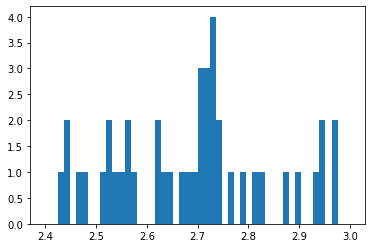

In [73]:
#3 

nbins = 50
XMIN = 2.4 # in GeV
XMAX = 3.0 # in GeV
bins = np.linspace(XMIN,XMAX,nbins)

counts = np.array([0, 0, 1, 2, 0, 1 , 1 , 0 , 0 , 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1,
0, 1, 1, 1, 3, 3, 4, 2, 0, 1 , 0 , 1 , 0 , 1, 1, 0, 0, 0, 1, 0, 1, 0,
0, 1, 2, 0, 2, 0, 0]).astype ( float )
tot = 0
for i in counts:
    tot += i
    
print("total # of events =",tot,"# of bins =",len (counts))
plt.hist(bins,bins = len(counts),weights=counts,range=(min(bins),max(bins)))
plt.show()


In [82]:
#3a

average = tot/len(counts)
print("Average number of counts per bin = {:.2f}".format(average))

Average number of counts per bin = 0.86


In [84]:
#3b

peak = bins[np.argmax(counts)]
print("Peak background is at {:.2f} GeV".format(peak))

Peak background is at 2.73 GeV


In [87]:
#window = 2.5*(bins[1]-bins[0]) #MeV

n_obs = 0
down = np.argmax(counts)-2
print(down)

for i in range(5):
    print(i)
    n_obs += counts[down+i+1]
    
print(n_obs)

25
0
1
2
3
4
10.0
